In [ ]:
!pip install tensorflow numpy pandas scikit-learn

import pandas as pd
import numpy as np
import time
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report
from tensorflow.keras.utils import plot_model

In [ ]:
train_data = pd.read_csv('train_en.tsv', sep='\t')
dev_data = pd.read_csv('dev_en.tsv', sep='\t')

# Assuming the data has columns 'text' for the tweet and 'label' for the classification
train_texts = train_data['text'].values
train_labels = train_data['HS'].values  # Use 'HS' as the label
dev_texts = dev_data['text'].values
dev_labels = dev_data['HS'].values

# Tokenization and Padding
tokenizer = Tokenizer()
tokenizer.fit_on_texts(train_texts)
train_sequences = tokenizer.texts_to_sequences(train_texts)
dev_sequences = tokenizer.texts_to_sequences(dev_texts)
max_length = max([len(x) for x in train_sequences])
train_padded = pad_sequences(train_sequences, maxlen=max_length, padding='post')
dev_padded = pad_sequences(dev_sequences, maxlen=max_length, padding='post')
vocab_size = len(tokenizer.word_index) + 1


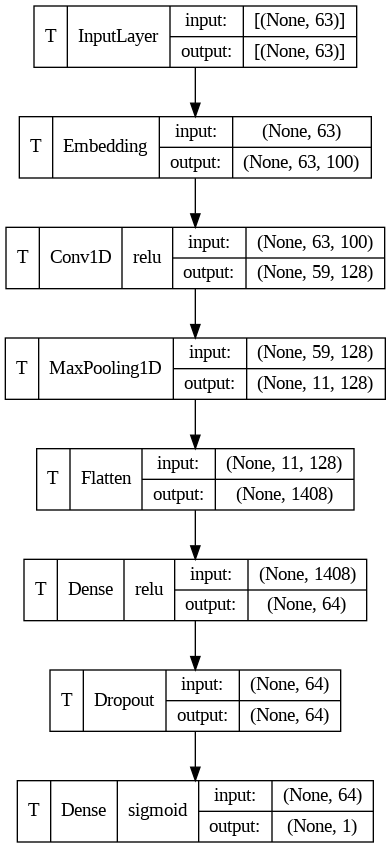

In [ ]:
model = Sequential([
    Embedding(vocab_size, 100, input_length=max_length),
    Conv1D(128, 5, activation='relu'),
    MaxPooling1D(5),
    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

plot_model(model, to_file="/content/cnn.png", show_shapes=True, show_dtype=False, show_layer_names=False, show_trainable=True, show_layer_activations=True)

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_6 (Embedding)     (None, 63, 100)           2701300   
                                                                 
 conv1d_6 (Conv1D)           (None, 59, 128)           64128     
                                                                 
 max_pooling1d_6 (MaxPoolin  (None, 11, 128)           0         
 g1D)                                                            
                                                                 
 flatten_6 (Flatten)         (None, 1408)              0         
                                                                 
 dense_12 (Dense)            (None, 64)                90176     
                                                                 
 dropout_6 (Dropout)         (None, 64)                0         
                                                      

In [ ]:
early_stopping = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)

start_time = time.time()
history = model.fit(
    train_padded, train_labels,
    epochs=10,
    validation_data=(dev_padded, dev_labels),
    callbacks=[early_stopping]
)
end_time = time.time()
total_time = end_time - start_time

Epoch 1/10
282/282 [==============================] - 18s 60ms/step - loss: 0.5661 - accuracy: 0.7003 - val_loss: 0.5151 - val_accuracy: 0.7490
Epoch 2/10
282/282 [==============================] - 18s 63ms/step - loss: 0.3188 - accuracy: 0.8676 - val_loss: 0.5744 - val_accuracy: 0.7390
Epoch 3/10
282/282 [==============================] - 18s 62ms/step - loss: 0.0994 - accuracy: 0.9678 - val_loss: 0.8318 - val_accuracy: 0.7040


In [ ]:
from sklearn.metrics import accuracy_score, f1_score, precision_score

# Predict on dev set
dev_predictions = model.predict(dev_padded)
dev_predictions = [1 if prob > 0.5 else 0 for prob in dev_predictions]

# Calculate Accuracy, F1 Score, and Precision
accuracy = accuracy_score(dev_labels, dev_predictions)
f1 = f1_score(dev_labels, dev_predictions, average='binary')  # For binary classification
precision = precision_score(dev_labels, dev_predictions, average='binary')  # For binary classification

print(f'Accuracy: {accuracy}')
print(f'F1 Score: {f1}')
print(f'Precision: {precision}')
print(f"Total training time: {total_time} seconds")

32/32 [==============================] - 0s 7ms/step
Accuracy: 0.749
F1 Score: 0.7274701411509228
Precision: 0.6781376518218624
Total training time: 53.33775877952576 seconds
